In [1]:
import os
import shutil

In [2]:
TRAIN_DIR = "./DATASET"

ORG_DIR = "../../_Test/Data"

CLASS = ["anh cam" , "anh nong", "balo", "book", "laptop", "smartphone", "vali", "watch"]

In [3]:
def copy_images_by_class(classes, source_dir, target_dir):
    for class_name in classes:
        dest = os.path.join(target_dir, class_name)

        if not os.path.exists(dest):
            os.makedirs(dest)

        # Use os.listdir to get the list of files in the source directory for the current class
        for img_file in os.listdir(os.path.join(source_dir, class_name)):
            src = os.path.join(source_dir, class_name, img_file)

            # Check if the path is a file (not a subdirectory) before copying
            if os.path.isfile(src):
                shutil.copy(src, dest)

In [4]:
copy_images_by_class(CLASS, ORG_DIR, TRAIN_DIR)

In [5]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory(TRAIN_DIR)

Found 6375 files belonging to 8 classes.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras 

In [7]:
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
X = Flatten()(base_model.output)
X = Dense(units=8, activation='sigmoid')(X)

model = Model(base_model.input, X)

model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [10]:
from scipy.ndimage import uniform_filter, median_filter

In [11]:
def preprocess_input_with_filters(img):
    # Thêm bộ lọc trung bình
    img = uniform_filter(img, size=(3, 3, 1))
    
    # Thêm bộ lọc median
    img = median_filter(img, size=(3, 3, 1))
    
    # Tiền xử lý thông qua hàm preprocess_input của mô hình
    img = preprocess_input(img)
    
    return img

In [12]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=0.4,
    width_shift_range=0.3,
    horizontal_flip=True,
    preprocessing_function=preprocess_input_with_filters,
    zoom_range=0.4,
    shear_range=0.4
)

train_data = train_datagen.flow_from_directory(
    directory="./DATASET",
    target_size=(256, 256),
    batch_size=64,
    class_mode='categorical'  # Định dạng nhãn cho các lớp 
)

Found 6372 images belonging to 8 classes.


In [13]:
train_data.class_indices

{'anh cam': 0,
 'anh nong': 1,
 'balo': 2,
 'book': 3,
 'laptop': 4,
 'smartphone': 5,
 'vali': 6,
 'watch': 7}

In [15]:
t_img, 
label = train_data.next()

In [16]:
def plotImages(img_arr, label):

    for idx, img in enumerate(img_arr):
        
        if idx <= 5:
            
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


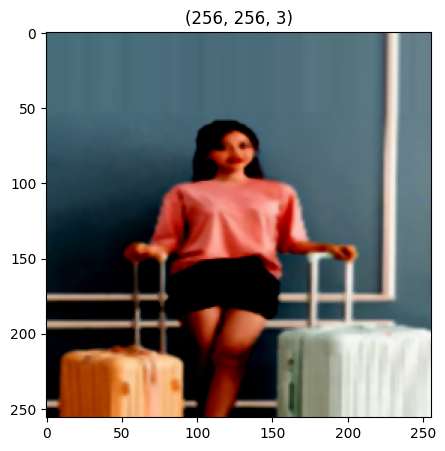

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


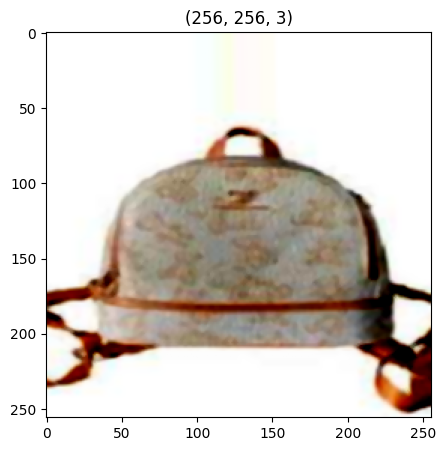

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


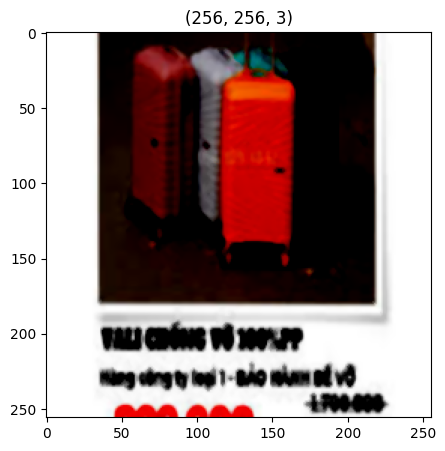

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


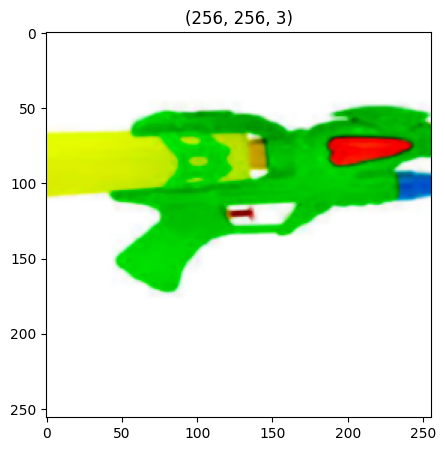

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


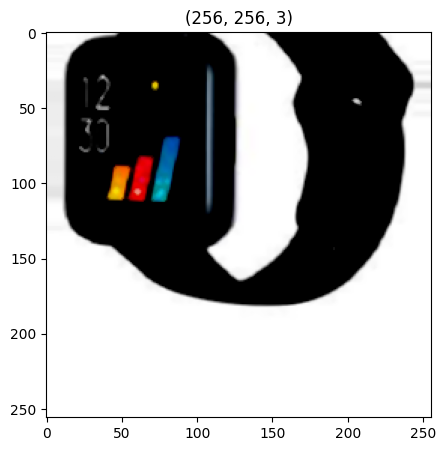

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


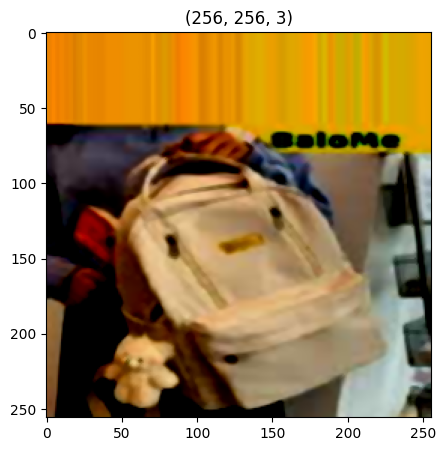

In [17]:
plotImages(t_img, label)

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(
    filepath="./test.h5",
    monitor="accuracy",
    verbose=1,
    save_best_only=True,
)

es = EarlyStopping(
    monitor="accuracy",
    min_delta=0.005,
    verbose=1,
)

cb = [mc, es]

In [22]:
his = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=20,
    callbacks=cb
)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 3.2607 - accuracy: 0.3328
Epoch 1: accuracy improved from -inf to 0.33281, saving model to .\test.h5


c:\Users\phuto\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 30s 3s/step - loss: 3.2607 - accuracy: 0.3328
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.9794 - accuracy: 0.5686
Epoch 2: accuracy improved from 0.33281 to 0.56863, saving model to .\test.h5
10/10 [==============================] - 27s 3s/step - loss: 0.9794 - accuracy: 0.5686
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.4641 - accuracy: 0.7734
Epoch 3: accuracy improved from 0.56863 to 0.77344, saving model to .\test.h5
10/10 [==============================] - 28s 3s/step - loss: 0.4641 - accuracy: 0.7734
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8062
Epoch 4: accuracy improved from 0.77344 to 0.80625, saving model to .\test.h5
10/10 [==============================] - 29s 3s/step - loss: 0.3448 - accuracy: 0.8062
Epoch 5/20
10/10 [==============================] - ETA: 0s - loss: 0.3174 - accuracy: 0.8016
Epoch 5: accuracy did not improve from 0.8

In [23]:
from keras.models import load_model

model = load_model("./test.h5")

In [24]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

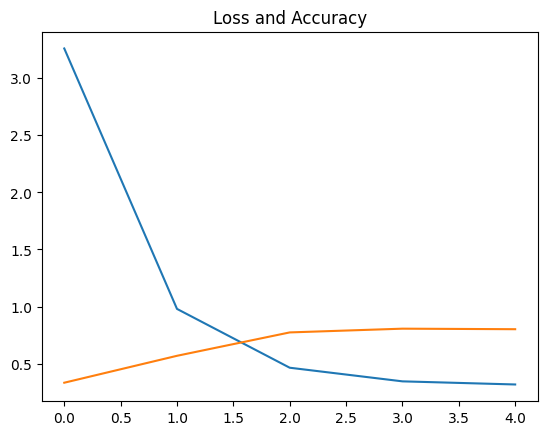

In [25]:
plt.plot(h['loss'])
plt.plot(h['accuracy'])
plt.title("Loss and Accuracy")
plt.show()

In [26]:
from keras.preprocessing.image import load_img, img_to_array

In [40]:
def get_img_arr(path):

    img = load_img(path, target_size=(256, 256))
    
    i = img_to_array(img)

    img = preprocess_input(i)

    img = np.array([i])
    
    return img


In [41]:
def make_gracam_heatmap(img_arr, model, last_conv_layer_name, pred_index = None):
    
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.get_layer(last_conv_layer_name).output,model.output]
    )
    
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_arr)
        
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
            
        class_channel = preds[:, pred_index]
        
        
    grads = tape.gradient(class_channel, last_conv_layer_output)
    
    pooles_grad = tf.reduce_mean(grads, axis = (0,1,2))
    
    last_conv_layer_output = last_conv_layer_output[0]
    
    heatmap = last_conv_layer_output @ pooles_grad[..., tf.newaxis]
    
    heatmap = tf.squeeze(heatmap)
    
    heatmap = tf.maximum(heatmap, 0)/tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

In [42]:
import matplotlib.cm as cm
from IPython.display import display, Image

def save_and(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    
    img = img_to_array(load_img(img_path))
    
    heatmap = np.uint8(255*heatmap)
    
    jet = cm.get_cmap("jet")
    
    jet_color = jet(np.arange(256))[:, :3]
    
    jet_heatmap = jet_color[heatmap]
    
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    
    superimposed_heatmap = jet_heatmap * alpha + img
    
    superimposed_heatmap = keras.preprocessing.image.array_to_img(superimposed_heatmap)
    
    superimposed_heatmap.save(cam_path)
    
    display(Image(cam_path))

In [43]:
def image_prediction_and_visualization(path, last_conv_layer_name="conv2d_93", model=model):
    
    img_arr = get_img_arr(path)
    
    heat_map = make_gracam_heatmap(img_arr, model, last_conv_layer_name)
    
    img = load_img(path, target_size=(256, 256))
    
    i = img_to_array(img)

    i = preprocess_input(i)

    input_arr = np.array([i])

    input_arr.shape
    
    plt.title("the heatmap of the image is")
    
    plt.imshow(heat_map)
    plt.show()
    
    pred = np.argmax(model.predict(input_arr))
    
    if pred == 0:
        print("Anh cam")
    if pred == 1:
        print("Anh nong")
    if pred == 2:
        print("Balo")
    if pred == 3:
        print("Book")
    if pred == 4:
        print("Laptop")
    if pred == 5:
        print("Smartphone")
    if pred == 6:
        print("Vali")
    if pred == 7:
        print("Watch")
    
    # save_and(path, heat_map)
    
    a = plt.imread(path)
    
    plt.imshow(a, cmap="gray")
    
    plt.title("Original image")
    
    plt.show()

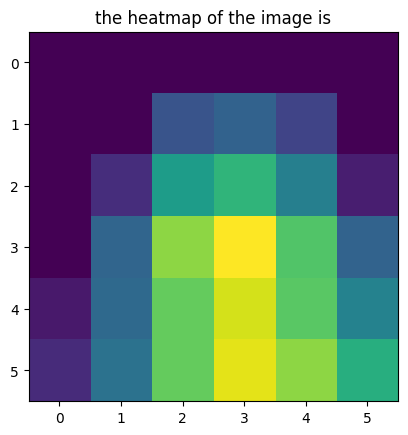

1/1 [==============================] - 0s 78ms/step
Book


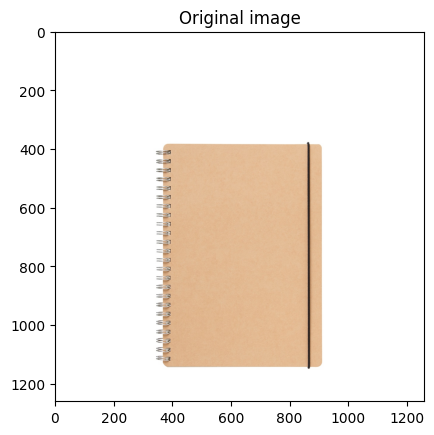

In [44]:
path = "../Test/4550182603040_1260.jpg"
image_prediction_and_visualization(path)